<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_9/b)_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Generate synthetic dataset
data, labels_true = make_blobs(
    n_samples=200,       # Number of samples
    centers=5,           # Number of centers (clusters)
    cluster_std=1.0,     # Standard deviation of clusters
    random_state=42      # For reproducibility
)

In [3]:
# Convert to DataFrame for consistency
data = pd.DataFrame(data, columns=['Feature 1', 'Feature 2'])

In [4]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [5]:
# Display first few rows
print("Dataset Generated and Standardized:")
data.head()

Dataset Generated and Standardized:


,Feature 1,Feature 2
0,-8.079924,-7.214611
1,-2.422151,8.715279
2,0.574216,2.753988
3,-8.012911,8.137033
4,5.161820,2.270154


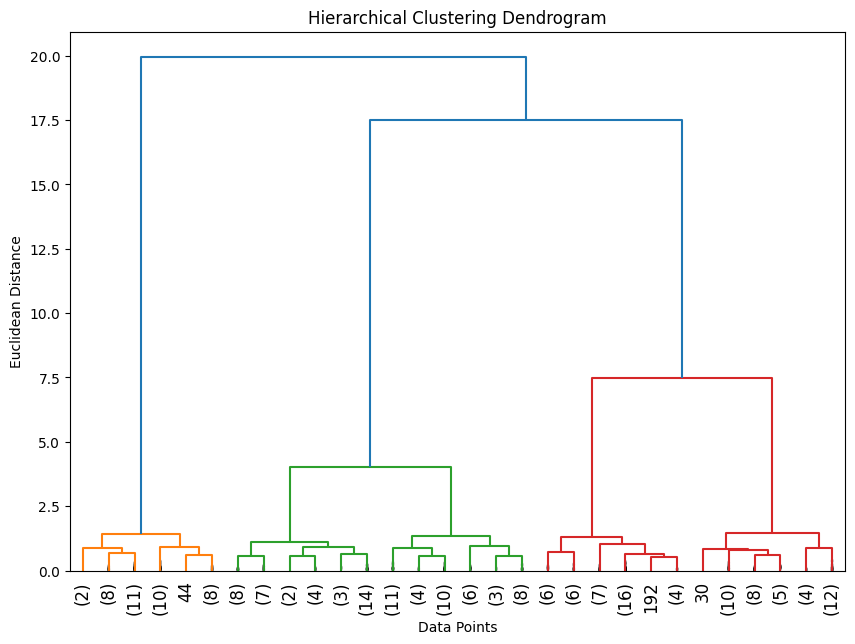

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using Ward's method
linked = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=12, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [7]:
from sklearn.cluster import AgglomerativeClustering

# Set the number of clusters based on the dendrogram
n_clusters = 5  # Choose based on the dendrogram

# Apply Agglomerative Clustering
clustering_model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
labels = clustering_model.fit_predict(scaled_data)

# Add cluster labels to the original dataset
data['Cluster'] = labels

print("Clustering complete. Assigned cluster labels to data.")
data.head()



Clustering complete. Assigned cluster labels to data.


,Feature 1,Feature 2,Cluster
0,-8.079924,-7.214611,1
1,-2.422151,8.715279,3
2,0.574216,2.753988,4
3,-8.012911,8.137033,0
4,5.161820,2.270154,2


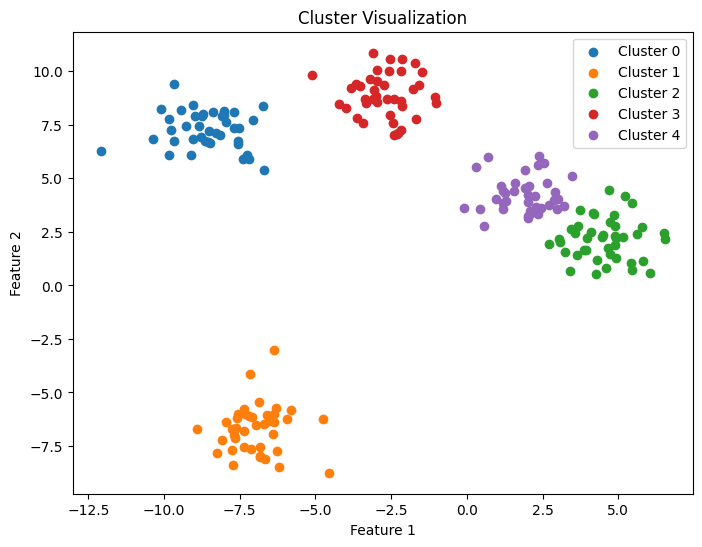

In [8]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    cluster_points = data[data['Cluster'] == cluster]
    plt.scatter(cluster_points['Feature 1'], cluster_points['Feature 2'], label=f'Cluster {cluster}')

plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Clustering quality metrics
silhouette_avg = silhouette_score(scaled_data, labels)
davies_bouldin = davies_bouldin_score(scaled_data, labels)

print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")


Silhouette Score: 0.68
Davies-Bouldin Index: 0.45
